In [19]:
import math
import geopandas as gpd
from shapely.geometry import Polygon

def calculate_polygons(startx, starty, endx, endy, radius, CRS = ""):
    """ 
    Calculate a grid of hexagon coordinates of the given radius
    given lower-left and upper-right coordinates 
    Returns a list of lists containing 6 tuples of x, y point coordinates
    These can be used to construct valid regular hexagonal polygons
    
    You will probably want to use projected coordinates for this
    """

    
    # calculate side length given radius   
    sl = (2 * radius) * math.tan(math.pi / 6)
    # calculate radius for a given side-length
    # (a * (math.cos(math.pi / 6) / math.sin(math.pi / 6)) / 2)
    # see http://www.calculatorsoup.com/calculators/geometry-plane/polygon.php
    
    # calculate coordinates of the hexagon points
    # sin(30)
    p = sl * 0.5
    b = sl * math.cos(math.radians(30))
    w = b * 2
    h = 2 * sl
    
    # offset start and end coordinates by hex widths and heights to guarantee coverage     
    startx = startx - w
    starty = starty - h
    endx = endx + w
    endy = endy + h

    origx = startx
    origy = starty


    # offsets for moving along and up rows
    xoffset = b
    yoffset = 3 * p

    polygons = []
    row = 1
    counter = 0

    while starty < endy:
        if row % 2 == 0:
            startx = origx + xoffset
        else:
            startx = origx
        while startx < endx:
            p1x = startx
            p1y = starty + p
            p2x = startx
            p2y = starty + (3 * p)
            p3x = startx + b
            p3y = starty + h
            p4x = startx + w
            p4y = starty + (3 * p)
            p5x = startx + w
            p5y = starty + p
            p6x = startx + b
            p6y = starty
            poly = [
                (p1x, p1y),
                (p2x, p2y),
                (p3x, p3y),
                (p4x, p4y),
                (p5x, p5y),
                (p6x, p6y),
                (p1x, p1y)]
            polygons.append(poly)
            counter += 1
            startx += w
        starty += yoffset
        row += 1
        
        
    l = len(polygons)

    output = []
    for i in range(1,l):
        p1 = Polygon(polygons[i])
        output.append(p1)
        
    
    ###Optionally set CRS   
    if CRS == "":
        #print("No")
        polygon_gdf =  gpd.GeoDataFrame(geometry=output)
    else:
        #print("Yes")
        polygon_gdf =  gpd.GeoDataFrame(geometry=output).set_crs(CRS)
    
    return polygon_gdf

<AxesSubplot:>

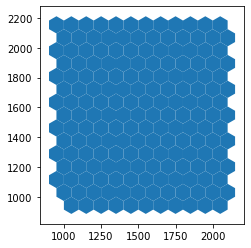

In [20]:
h_grid = calculate_polygons(1000, 1000, 2000, 2000, 50, CRS = "EPSG:27700")
h_grid.plot()